
## Low level images in numpy
Images are essentially collections of pixels and pixels are represented by numbers, so the &ldquo;natural&rdquo; way to operate on these numbers is to use NumPy arrays. A PIL image can be converted to a numpy array, by passing it as an argument to the `np.array` constructor fuction. It is then possible to display it as usual in a canvas


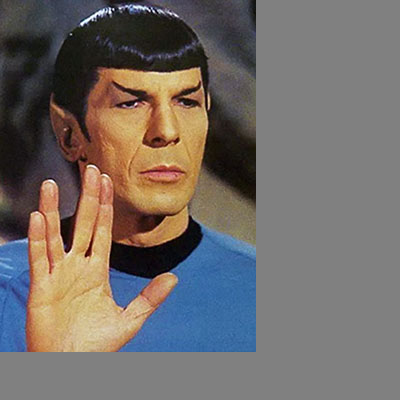

In [ ]:
import numpy as np

img = load_image('spock.jpg')
create_canvas(400, 400)
ary = np.array(img)
image(ary) #np.array(img.convert('L')))
show()

Here we converted the image to grayscale, so if we print the array shape we see that it is:



In [ ]:
print(ary.shape)
# w = ary.shape[1]
# h = ary.shape[0]
ary[5, 3, 0]

(352, 256, 3)


76

that is an array with 352 rows and 256 columns. The `shape` property is a sequence of numbers with the height (the number of rows) being `shape[0]` and
the width (the number of columns) being `shape[1]`. As previously mentioned, this a bit confusing but is due to how images are stored in memory, row by row, which is reflects in the &ldquo;shape&rdquo; of the array.

We can print part of these values using [&ldquo;slicing&rdquo;](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp):



In [ ]:
ary[:5, :5]

array([[57, 55, 65, 75, 72],
       [60, 59, 66, 73, 71],
       [59, 63, 66, 70, 72],
       [57, 63, 66, 70, 75],
       [58, 65, 67, 71, 77]], dtype=uint8)

> **NOTE** as a reminder slicing an array follows the syntax `[start:end]` or for 2d arrays `[start_row:end_row, start_col:end_col]`. Omitting any of the starting or ending indices means starting from the beginning or going till the end of the array, respectively.We can see that when outputing the array from a cell, the output shows a property `dtype`. This is a property that indicates the datatype of each array element and it becomes more important when doing low level operations on images. The type `np.uint8` (with `np` not shown when you print) means that each element of the array is an unsigned (always zero or positive) 8 bit integer. As previously mentioned this means that each array element only can contain a value between 0 and 255.

Py5Canvas also accepts images expressed with colors in the range between 0 and 1. We can convert the array to this format by dividing it by 255:



In [ ]:
ary01 = ary/255
ary01[2:, 2:]

array([[0.25882353, 0.2745098 , 0.28235294, ..., 0.08235294, 0.0745098 ,
        0.0745098 ],
       [0.25882353, 0.2745098 , 0.29411765, ..., 0.08627451, 0.07058824,
        0.06666667],
       [0.2627451 , 0.27843137, 0.30196078, ..., 0.09019608, 0.0745098 ,
        0.0745098 ],
       ...,
       [0.38039216, 0.37647059, 0.38039216, ..., 0.38039216, 0.37647059,
        0.37254902],
       [0.37647059, 0.37647059, 0.38039216, ..., 0.36862745, 0.36862745,
        0.37254902],
       [0.37254902, 0.37647059, 0.38431373, ..., 0.35686275, 0.36862745,
        0.37647059]])

In which case the `dtype` property of the array becomes:



In [ ]:
ary01.dtype

dtype('float64')

Meaning it can contain floating point numbers (numbers like `10.123223` as opposed to `10`) with 64 bits of precision. This precision can be useful or even necessary when doing certain computations on array.

Now, how can using NumPy arrays be useful when dealing with images? The main advantages are flexibility and speed!
We can treat whole images as &ldquo;numbers&rdquo; and perform mathematical operations on them.
One practical example to demonstrate this is [gamma correction](https://en.wikipedia.org/wiki/Gamma_correction) which adjusts the brightness of an image by using a power:



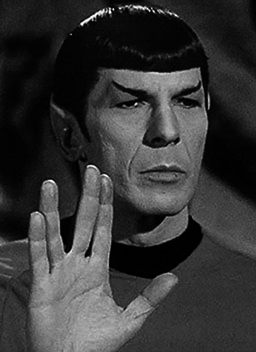

In [ ]:
img = load_image('spock.jpg').convert('L')
img = np.array(img)/255
gamma = 1.75
img = img**gamma
create_canvas(img.shape[1], img.shape[0])
image(img)
show()

Here we use the operator `**` to raise each value in the image array to the power `gamma`. In this case it is particularly useful to have the image in the range 0 to 1, since for any number $n$, $0^n=0$ and $1^n=1$.

Another less practical example could be treating all the intensity in an image as an input to a sinewave, e.g.



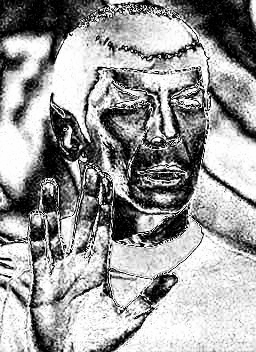

In [ ]:
img = load_image('spock.jpg').convert('L')
img = np.array(img)/255
img = np.sin(img*np.pi*6)
img = remap(img, -1, 1, 0, 1)
create_canvas(img.shape[1], img.shape[0])
image(img)
show()

Note that we can use the `remap` function also on arrays, since internally it is written using NumPy. It simply applies the re-mapping to all the element in the array.



### Looping over images in NumPy



We can access the pixels in an image represented as an array with a similar procedure to what we did earlier, keeping in mind that the width is the property `shape[1]` and height is the property `shape[0]`:



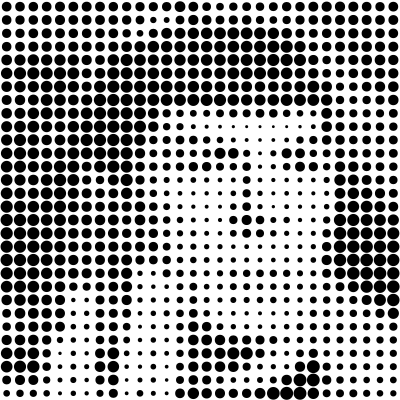

In [ ]:
create_canvas(400, 400)
background(255)
fill(0)
no_stroke()

img = load_image('spock.jpg').crop((0, 0, 250, 250))
# Resize and convert to an array in the 0 to 1 range
img = np.array(img.resize((30,30)).convert('L'))/255

spacing = width/img.shape[0]

for y in range(img.shape[0]):
    for x in range(img.shape[1]): #
        push()
        v = img[y, x]
        radius = remap(v, (0, 1), (spacing*0.5, 0.0))
        translate(x*spacing+spacing/2, y*spacing+spacing/2)
        circle(0, 0, radius)
        #rect(x, y, 1, 1)
        pop()
show()

The array represetation is useful because we can now create custom operations on the image that are efficient, for instance in one of today&rsquo;s interactive examples, we will interpolate between frames grabbed from the computer camera to smoothly animate these circles, or other shapes.



> **LAB WORK:** Look at the video_input_shapes_numpy example. Experiment with different shapes and interpolation values.

### Color images with numpy



We can also represent color images with NumPy with a similar syntax:



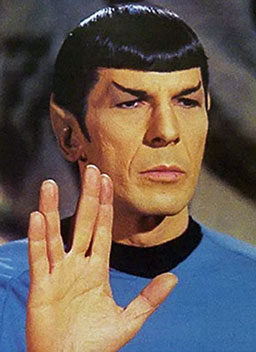

In [ ]:
im = load_image('spock.jpg')
ary = np.array(im)
create_canvas(ary.shape[1], ary.shape[0])
image(ary)
show()

Again we can print the array shape but this time we see an additional number:



In [ ]:
ary.shape

(352, 256, 3)

Indicating that we now have a 3d array, where the last dimension is the number of channels (R, G, B). Think of it as three 2d slices, with each slice being one channel. Indeed we can visulize one channel, using the &ldquo;slicing&rdquo; syntax, where `ary[:,:,0]` is the red channel and the `:` stands for &ldquo;all the elements in a given dimension&rdquo;:



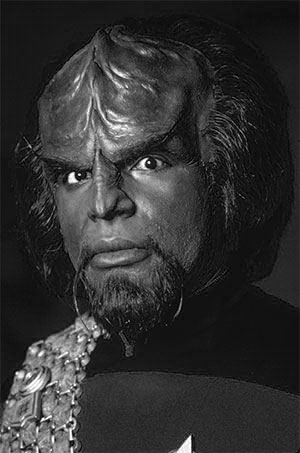

In [ ]:
im = load_image('worf.jpg')
ary = np.array(im)
create_canvas(ary.shape[1], ary.shape[0])
image(ary[:,:,2])
show()

You can apply operations to a single channel for instance to decrease the amount of blue, but in this case it is better to convert the image to the 0 to 1 range. Otherwise, we are likely to get a different datatype for one channel, which is not allowed:



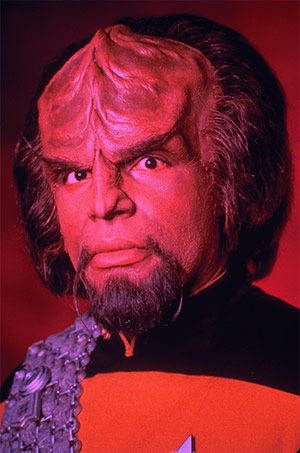

In [ ]:
ary = np.array(im)/255
ary[:,:,1] *= 0.5
create_canvas(ary.shape[1], ary.shape[0])
image(ary)
show()

#### Blending two images using NumPy



Now, staying in the Star Trek theme, let&rsquo;s blend an image of Spock and an image of Worf. This will require making sure that both images have the same size. There are different ways to do this without distortion, one being using PIL:

-   Compute the aspect ratio (height/width) of one image
-   Resize it to the desired with and height its width times the aspect ratio
-   Crop both to have the minimum height of the two images



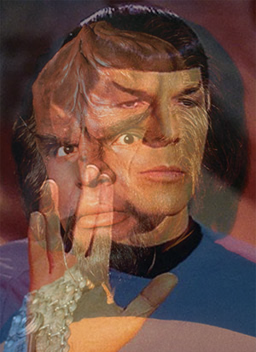

In [ ]:
im1 = load_image('spock.jpg')
im2 = load_image('worf.jpg')

# The procedure described above
w = im1.width
aspect_ratio = im2.height/im2.width
im2 = im2.resize((w, int(w*aspect_ratio)))
h = min(im1.height, im2.height)
im1 = im1.crop((0, 0, w, h))
im2 = im2.crop((0, 0, w, h))

# Convert to numpy (0 to 1 range)
im1 = np.array(im1)/255
im2 = np.array(im2)/255

create_canvas(w, h)
image(lerp(im1, im2, 0.5))
show()

Notice that again we can use a Py5Canvas on arrays as we used it on numbers, in this case `lerp`. The function will work as long as the arrays have the same size, applying its operation on each array element.
Note also that you can avoid all the resizing/cropping code by simply loading images that are already the same size (e.g. resized in Photoshop)



### Procedural images with Numpy



A more advanced example allows us to create a linear gradient by using `linspace` with inputs that are not numbers but arrays. The result is a 2d array. An additional named parameter `axis` determines if we interpolate along the rows (`axis=0`, a vertical gradient) or along the columns (`axis=1`, a horizontal gradient)



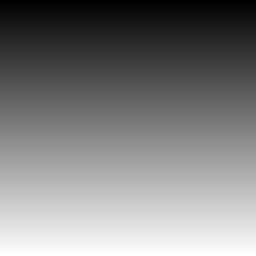

In [ ]:
w, h = 256, 256
im = np.linspace(np.zeros(w), np.ones(w), h, axis=0)
create_canvas(w, h)
image(im)
show()

We can combine two gradients by multiplying them



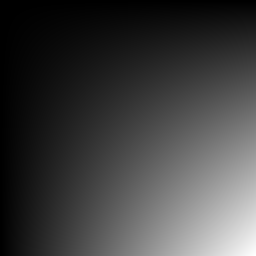

In [ ]:
w, h = 256, 256
gradient_v = np.linspace(np.zeros(w), np.ones(w), h, axis=0)
gradient_h = np.linspace(np.zeros(w), np.ones(w), h, axis=1)
create_canvas(w, h)
image(gradient_v * gradient_h)
show()

And create patterns by applying math operations to array values



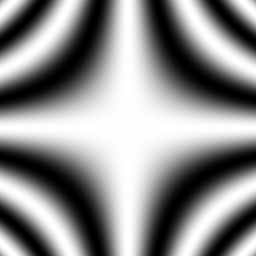

In [ ]:
def normalize_image(im):
    return (im - im.min())/(im.max() - im.min())

w, h = 256, 256
gradient_v = np.linspace(-np.ones(w), np.ones(w), h, axis=0)
gradient_h = np.linspace(-np.ones(w), np.ones(w), h, axis=1)

im = normalize_image(np.cos(gradient_v * gradient_h * 14))
create_canvas(w, h)
image(im)
show()

Here we defined a function `normalize_image` that takes an image expressed as a NumPy array and &ldquo;normalizes&rdquo; it so it lies in the range 0 to 1. It may come useful if you want to do operations on images where the output range is not easy to predict.

If you are interested on how these kind of method operating on images can be pushed to the limit you should check the work of [Simone Conradi](https://x.com/s_conradi)

